In [1]:
#Загрузите датасет transaction_data.csv. 
#Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
transactions = pd.read_csv('C:/Users/79196/Projects/data/transaction_data.csv')
transactions

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
transactions.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
transactions.shape

(5315, 3)

In [6]:
transactions.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [7]:
transactions.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [8]:
#Проверьте, какие значения принимает колонка transaction? 
#Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.
#Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)
quantity_transaction = transactions.groupby('transaction', as_index=False) \
                                   .agg({'name':'count'}) \
                                   .sort_values('name', ascending=False) \
                                   .rename(columns={'name':'quantity'}) 
quantity_transaction

,transaction,quantity
2,successfull,3692
0,cancelled,1619
1,error,4


<Axes: xlabel='transaction'>

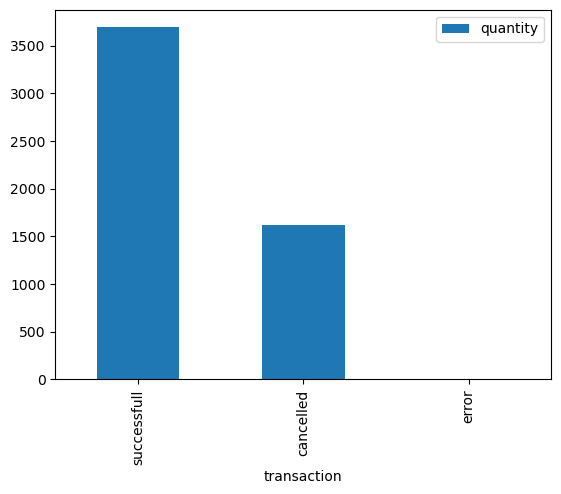

In [9]:
quantity_transaction.plot.bar(x='transaction', y='quantity')

In [10]:
#Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
#Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, 
#совершённых каждым пользователем, где:
#по оси x – число транзакций
#по оси y – доля пользователей с таким числом транзакций
successfull_transactions = transactions.query('transaction == "successfull"') \
                                       .groupby('name', as_index=False) \
                                       .agg({'transaction':'count'}) \
                                       .rename(columns={'transaction':'quantity_successfull'}) \
                                       .sort_values('quantity_successfull', ascending=False)
successfull_transactions

,name,quantity_successfull
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


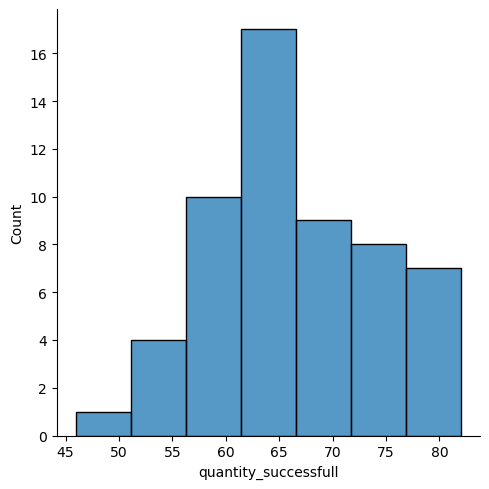

In [11]:
sns.displot(successfull_transactions.quantity_successfull)
# 1.Пользователи в среднем совершили примерно по 66 транзакций     mean=65.92857142857143
# 2.Максимальное число транзакций – 82                             max=82
# 3.Пользователи в среднем совершили по 64 транзакции
# 4.Примерно 25% пользователей совершили менее 61 транзакции       quantile(q=0.25)=61
# 5.Примерно 25% пользователей совершили более 61 транзакции
# 6.Пользователи в среднем совершили примерно по 56 транзакций
# 7.Максимальное число транзакций – 112
# 8.Пользователи в среднем совершили примерно по 94 транзакции

**Ответ:**  Правильные пункты 1,2,4,

In [12]:
successfull_transactions.quantity_successfull.mean()

65.92857142857143

In [13]:
successfull_transactions.quantity_successfull.quantile(q=0.25) 

61.0

In [14]:
successfull_transactions.quantity_successfull.max()

82

In [15]:
#К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:
#    столбцы – имена пользователей
#    строки – минута времени осуществления операции (minute)
#    значения – число совершённых операций
#Пропущенные значения заполните нулями.
transactions_updated = pd.read_csv('C:/Users/79196/Projects/data/transaction_data_updated.csv', parse_dates=['date'])
transactions_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [16]:
user_vs_minute_pivot = transactions_updated.groupby(['name', 'minute'], as_index=False) \
                                           .agg({'transaction':'count'}) \
                                           .pivot(index='minute', columns='name', values='transaction') \
                                           .reset_index() \
                                           .fillna(0) 
user_vs_minute_pivot                    

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


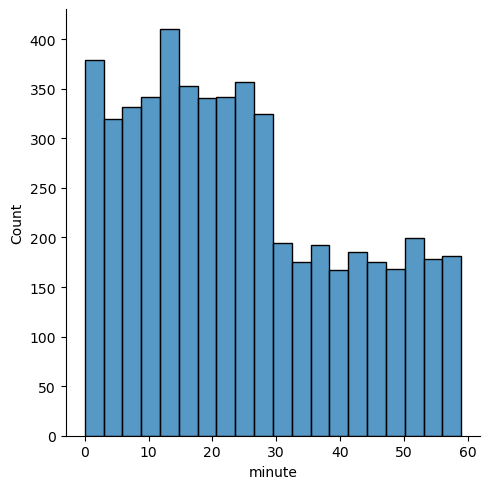

In [17]:
sns.displot(transactions_updated.minute)

In [18]:
transactions_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [19]:
#Исправьте ошибку коллеги (Извлекли минутную часть времени, а не число минут с начала дня), 
#и посчитайте число минут, прошедших с начала дня. 
#Результат сохраните в колонку true_minute
transactions_updated['true_minute'] = transactions_updated.date.dt.minute + \
                                      transactions_updated.date.dt.hour*60
transactions_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


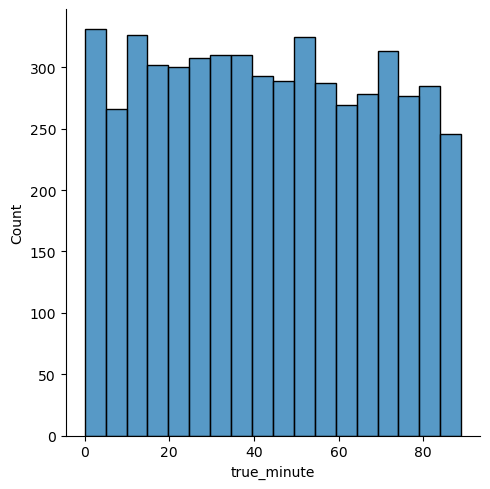

In [20]:
sns.displot(transactions_updated.true_minute)